In [8]:
import Downloads

In [9]:
Downloads.download("https://raw.githubusercontent.com/sidooms/MovieTweetings/44c525d0c766944910686c60697203cda39305d6/snapshots/10K/movies.dat","movies.dat")

"movies.dat"

## String Stuff

In [10]:
"examples" * " again" * "yo"

"examples againyo"

In [11]:
x = 12

12

In [12]:
"What about $x?"

"What about 12?"

In [13]:
"And then $(x ^ 3)"

"And then 1728"

In [14]:
"tests\
     again"

"testsagain"

In [15]:
"what\nabout"

"what\nabout"

In [16]:
raw"D:\my_folder\my_file_2.txt"

"D:\\my_folder\\my_file_2.txt"

# Basic file/string stuff

In [17]:
movies = readlines("movies.dat")

3096-element Vector{String}:
 "0002844::Fantômas - À l'ombre de la guillotine (1913)::Crime|Drama"
 "0007264::The Rink (1916)::Comedy|Short"
 "0008133::The Immigrant (1917)::Short|Comedy|Drama|Romance"
 "0012349::The Kid (1921)::Comedy|Drama|Family"
 "0013427::Nanook of the North (1922)::Documentary"
 "0014142::The Hunchback of Notre Dame (1923)::Drama|Romance"
 "0014538::Three Ages (1923)::Comedy"
 "0014872::Entr'acte (1924)::Short"
 "0015163::The Navigator (1924)::Action|Comedy"
 "0015324::Sherlock Jr. (1924)::Comedy|Fantasy"
 "0015400::The Thief of Bagdad (1924)::Adventure|Family|Fantasy|Romance"
 "0017925::The General (1926)::Action|Adventure|Comedy|Romance|War"
 "0018773::The Circus (1928)::Comedy|Romance"
 ⋮
 "2638984::Teal Diva (2012)::Documentary|Short"
 "2645104::Romantik komedi 2: Bekarliga veda (2013)::Comedy"
 "2645164::The Hardy Bucks Movie (2013)::Comedy"
 "2646378::The Frankenstein Theory (2013)::Horror|Sci-Fi"
 "2649128::Metro (2013)::Thriller"
 "2670226::Jîn (2013)::Dr

In [18]:
movie1 = first(movies)

"0002844::Fantômas - À l'ombre de la guillotine (1913)::Crime|Drama"

In [19]:
movie1_parts = split(movie1, "::")

3-element Vector{SubString{String}}:
 "0002844"
 "Fantômas - À l'ombre de la guillotine (1913)"
 "Crime|Drama"

`SubString{String}` ???

* View on strings
* Strings are immutable

### Basic string stuff

Note lowercased naming:

* string Converts passed values to a string by using the print function
* join—Joins elements of an iterator into a string, inserting the given delimiter between joined items
* occursin Checks if the first argument is a substring of the second argument
* contains Checks if the second argument is a substring of the first argument
* replace Finds in a given string passed patterns and replaces them with specified values

In [20]:
string(12)

"12"

In [21]:
join(["hi", "there"], ",")

"hi,there"

In [22]:
occursin("y", "yes")

true

In [23]:
contains("yes", "e")

true

In [24]:
contains("yes", "t")

false

In [25]:
replace("base thing", "b" => "*")

"*ase thing"

In [26]:
?replace

search: replace replace! replacefield! replaceproperty! @atomicreplace redisplay



```
replace(A, old_new::Pair...; [count::Integer])
```

Return a copy of collection `A` where, for each pair `old=>new` in `old_new`, all occurrences of `old` are replaced by `new`. Equality is determined using [`isequal`](@ref). If `count` is specified, then replace at most `count` occurrences in total.

The element type of the result is chosen using promotion (see [`promote_type`](@ref)) based on the element type of `A` and on the types of the `new` values in pairs. If `count` is omitted and the element type of `A` is a `Union`, the element type of the result will not include singleton types which are replaced with values of a different type: for example, `Union{T,Missing}` will become `T` if `missing` is replaced.

See also [`replace!`](@ref), [`splice!`](@ref), [`delete!`](@ref), [`insert!`](@ref).

!!! compat "Julia 1.7"
    Version 1.7 is required to replace elements of a `Tuple`.


# Examples

```jldoctest
julia> replace([1, 2, 1, 3], 1=>0, 2=>4, count=2)
4-element Vector{Int64}:
 0
 4
 1
 3

julia> replace([1, missing], missing=>0)
2-element Vector{Int64}:
 1
 0
```

---

```
replace(new::Function, A; [count::Integer])
```

Return a copy of `A` where each value `x` in `A` is replaced by `new(x)`. If `count` is specified, then replace at most `count` values in total (replacements being defined as `new(x) !== x`).

!!! compat "Julia 1.7"
    Version 1.7 is required to replace elements of a `Tuple`.


# Examples

```jldoctest
julia> replace(x -> isodd(x) ? 2x : x, [1, 2, 3, 4])
4-element Vector{Int64}:
 2
 2
 6
 4

julia> replace(Dict(1=>2, 3=>4)) do kv
           first(kv) < 3 ? first(kv)=>3 : kv
       end
Dict{Int64, Int64} with 2 entries:
  3 => 4
  1 => 3
```

---

```
replace(s::AbstractString, pat=>r, [pat2=>r2, ...]; [count::Integer])
```

Search for the given pattern `pat` in `s`, and replace each occurrence with `r`. If `count` is provided, replace at most `count` occurrences. `pat` may be a single character, a vector or a set of characters, a string, or a regular expression. If `r` is a function, each occurrence is replaced with `r(s)` where `s` is the matched substring (when `pat` is a `AbstractPattern` or `AbstractString`) or character (when `pat` is an `AbstractChar` or a collection of `AbstractChar`). If `pat` is a regular expression and `r` is a [`SubstitutionString`](@ref), then capture group references in `r` are replaced with the corresponding matched text. To remove instances of `pat` from `string`, set `r` to the empty `String` (`""`).

Multiple patterns can be specified, and they will be applied left-to-right simultaneously, so only one pattern will be applied to any character, and the patterns will only be applied to the input text, not the replacements.

!!! compat "Julia 1.7"
    Support for multiple patterns requires version 1.7.


# Examples

```jldoctest
julia> replace("Python is a programming language.", "Python" => "Julia")
"Julia is a programming language."

julia> replace("The quick foxes run quickly.", "quick" => "slow", count=1)
"The slow foxes run quickly."

julia> replace("The quick foxes run quickly.", "quick" => "", count=1)
"The  foxes run quickly."

julia> replace("The quick foxes run quickly.", r"fox(es)?" => s"bus\1")
"The quick buses run quickly."

julia> replace("abcabc", "a" => "b", "b" => "c", r".+" => "a")
"bca"
```


### More 
* strip Strips leading and trailing characters (by default, whitespace) from a string (also related are lstrip and rstrip for stripping leading and trailing characters)
* startswith Checks if a given string starts with a passed prefix
* endswith Checks if a given string ends with a passed suffix
* uppercase Uppercases a string
* lowercase Lowercases a string
* randstring Creates random strings (defined in the Random module)

In [27]:
strip("   yo ")

"yo"

In [28]:
startswith("base", "ba")

true

In [29]:
uppercase("hello")

"HELLO"

In [30]:
using Random

In [31]:
randstring()

"cREeJzPB"

### Regex

In [32]:
rEx = r".*\((\d{2,3})\)$"

r".*\((\d{2,3})\)$"

In [33]:
match(rEx, "stuff (23)")

RegexMatch("stuff (23)", 1="23")

In [34]:
rEx2 = r"(.*)\s\((\d{2,3})\)$"

r"(.*)\s\((\d{2,3})\)$"

In [35]:
match(rEx2, "stuff (23)")

RegexMatch("stuff (23)", 1="stuff", 2="23")

In [36]:
match(rEx2, "stuff(23)")

In [37]:
function parseline(line::AbstractString)
    parts = split(line, "::")
    m = match(r"(.+) \((\d{4})\)", parts[2])
    return (id=parts[1],
            name=m[1],
            year=parse(Int, m[2]),
            genres=split(parts[3], "|"))
end

parseline (generic function with 1 method)

In [38]:
parseline(movie1)

(id = "0002844", name = "Fantômas - À l'ombre de la guillotine", year = 1913, genres = SubString{String}["Crime", "Drama"])

In [39]:
example_word = "l'étude"

"l'étude"

In [42]:
for i in eachindex(example_word)
   print(i) 
end

1235678

Wait but no 4?

Unicode (utf8 at least) uses variable length encoding

## Actual Data Analysis!

In [43]:
records = parseline.(movies)

3096-element Vector{NamedTuple{(:id, :name, :year, :genres), Tuple{SubString{String}, SubString{String}, Int64, Vector{SubString{String}}}}}:
 (id = "0002844", name = "Fantômas - À l'ombre de la guillotine", year = 1913, genres = ["Crime", "Drama"])
 (id = "0007264", name = "The Rink", year = 1916, genres = ["Comedy", "Short"])
 (id = "0008133", name = "The Immigrant", year = 1917, genres = ["Short", "Comedy", "Drama", "Romance"])
 (id = "0012349", name = "The Kid", year = 1921, genres = ["Comedy", "Drama", "Family"])
 (id = "0013427", name = "Nanook of the North", year = 1922, genres = ["Documentary"])
 (id = "0014142", name = "The Hunchback of Notre Dame", year = 1923, genres = ["Drama", "Romance"])
 (id = "0014538", name = "Three Ages", year = 1923, genres = ["Comedy"])
 (id = "0014872", name = "Entr'acte", year = 1924, genres = ["Short"])
 (id = "0015163", name = "The Navigator", year = 1924, genres = ["Action", "Comedy"])
 (id = "0015324", name = "Sherlock Jr.", year = 1924, genre

In [44]:
genres = String[]
for record in records
   append!(genres, record.genres)
end

In [45]:
genres

8121-element Vector{String}:
 "Crime"
 "Drama"
 "Comedy"
 "Short"
 "Short"
 "Comedy"
 "Drama"
 "Romance"
 "Comedy"
 "Drama"
 "Family"
 "Documentary"
 "Drama"
 ⋮
 "Short"
 "Comedy"
 "Drama"
 "Family"
 "Short"
 "Comedy"
 "Short"
 "Drama"
 "Family"
 "Short"
 "Drama"
 "Short"

In [47]:
import Pkg; Pkg.add("FreqTables")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed FreqTables ──────── v0.4.5
   Installed InvertedIndices ─── v1.2.0
   Installed Combinatorics ───── v1.0.2
   Installed NamedArrays ─────── v0.9.6
   Installed CategoricalArrays ─ v0.10.7
    Updating `~/.julia/environments/v1.8/Project.toml`
  [da1fdf0e] + FreqTables v0.4.5
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [324d7699] + CategoricalArrays v0.10.7
  [861a8166] + Combinatorics v1.0.2
  [da1fdf0e] + FreqTables v0.4.5
  [41ab1584] + InvertedIndices v1.2.0
  [86f7a689] + NamedArrays v0.9.6
  [9fa8497b] + Future
Precompiling project...
  ✓ InvertedIndices
  ✓ Combinatorics
  ✓ CategoricalArrays
  ✓ NamedArrays
  ✓ FreqTables
  5 dependencies successfully precompiled in 1 seconds. 161 already precompiled.


In [48]:
using FreqTables

In [49]:
table = freqtable(genres)

25-element Named Vector{Int64}
Dim1        │ 
────────────┼─────
            │   14
Action      │  635
Adventure   │  443
Animation   │  137
Biography   │  166
Comedy      │ 1001
Crime       │  550
Documentary │  126
Drama       │ 1583
Family      │  222
Fantasy     │  278
⋮                ⋮
Music       │   83
Musical     │   58
Mystery     │  294
News        │    4
Romance     │  558
Sci-Fi      │  305
Short       │   46
Sport       │   84
Thriller    │  910
War         │  126
Western     │   35

In [50]:
sort!(table)

25-element Named Vector{Int64}
Dim1        │ 
────────────┼─────
News        │    4
Film-Noir   │   13
            │   14
Western     │   35
Short       │   46
Musical     │   58
Music       │   83
Sport       │   84
History     │  125
Documentary │  126
War         │  126
⋮                ⋮
Fantasy     │  278
Mystery     │  294
Sci-Fi      │  305
Horror      │  325
Adventure   │  443
Crime       │  550
Romance     │  558
Action      │  635
Thriller    │  910
Comedy      │ 1001
Drama       │ 1583

> Understanding genre popularity evolution over the years

In [51]:
years = [record.year for record in records]

3096-element Vector{Int64}:
 1913
 1916
 1917
 1921
 1922
 1923
 1923
 1924
 1924
 1924
 1924
 1926
 1928
    ⋮
 2012
 2013
 2013
 2013
 2013
 2013
 2010
 2012
 2013
 2013
 2013
 2013

In [52]:
has_drama = ["Drama" in record.genres for record in records]

3096-element Vector{Bool}:
 1
 0
 1
 1
 0
 1
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 1
 0
 1
 0
 1
 1
 0

In [53]:
drama_prop = proptable(years, has_drama; margins=1)

93×2 Named Matrix{Float64}
Dim1 ╲ Dim2 │    false      true
────────────┼───────────────────
1913        │      0.0       1.0
1916        │      1.0       0.0
1917        │      0.0       1.0
1921        │      0.0       1.0
1922        │      1.0       0.0
1923        │      0.5       0.5
1924        │      1.0       0.0
1926        │      1.0       0.0
1928        │      1.0       0.0
1929        │      1.0       0.0
1930        │ 0.333333  0.666667
⋮                    ⋮         ⋮
2003        │ 0.533333  0.466667
2004        │ 0.438095  0.561905
2005        │ 0.387931  0.612069
2006        │ 0.426357  0.573643
2007        │ 0.492063  0.507937
2008        │ 0.424051  0.575949
2009        │ 0.432432  0.567568
2010        │ 0.451754  0.548246
2011        │ 0.484472  0.515528
2012        │ 0.577017  0.422983
2013        │ 0.623529  0.376471

In [54]:
using Plots

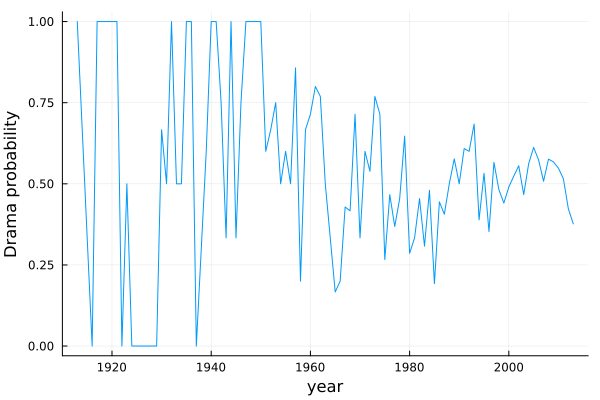

In [55]:
plot(names(drama_prop, 1), drama_prop[:, 2]; legend=false,
            xlabel="year", ylabel="Drama probability")

### EXERCISE 

Create a plot of the number of movies by year, using the years variable.

## Symbols

In [56]:
sX = Symbol("x")

:x

In [57]:
sX2 = Symbol("x", 2)

:x2

In [58]:
typeof(sX2)

Symbol

In [59]:
Symbol(1)

Symbol("1")

Note printing style here, as isn't valid idenifier

In [60]:
using BenchmarkTools

In [61]:
str = string.("x", 1:10^6)
symb = Symbol.(str)

1000000-element Vector{Symbol}:
 :x1
 :x2
 :x3
 :x4
 :x5
 :x6
 :x7
 :x8
 :x9
 :x10
 :x11
 :x12
 :x13
 ⋮
 :x999989
 :x999990
 :x999991
 :x999992
 :x999993
 :x999994
 :x999995
 :x999996
 :x999997
 :x999998
 :x999999
 :x1000000

In [62]:
@btime "x" in $str

  2.012 ms (0 allocations: 0 bytes)


false

In [63]:
@btime :x in $symb

  470.791 μs (0 allocations: 0 bytes)


false

## Fixed-width string types

In [67]:
import Pkg; Pkg.add("InlineStrings")

   Resolving package versions...
   Installed InlineStrings ─ v1.4.0
    Updating `~/.julia/environments/v1.8/Project.toml`
  [842dd82b] + InlineStrings v1.4.0
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [842dd82b] + InlineStrings v1.4.0
Precompiling project...
  ✓ InlineStrings
  1 dependency successfully precompiled in 1 seconds. 166 already precompiled.


In [69]:
using InlineStrings

In [70]:
s3 = String3("yo!")

"yo!"

In [71]:
typeof(s3)

String3

In [73]:
supertype(typeof(s3))

InlineString

In [74]:
supertype(supertype(typeof(s3)))

AbstractString

> In part 2 of this book, you will learn that when getting your data from a CSV file, the Julia CSV reader can automatically detect that it is useful to use fixed-width strings instead of the standard String type. Therefore, in practice, it is usually enough to be aware of the existence and meaning of fixed-width strings, so that when you see them in a data frame, you are not surprised to encounter a column consisting of String3
strings.

## PooledArrays.jl: compressing vectors of strings

In [75]:
open("iris.txt", "w") do io
   for i in 1:10^6
       println(io, "Iris setosa")
       println(io, "Iris virginica")
       println(io, "Iris versicolor")
    end 
end

In [76]:
isfile("iris.txt")

true

In [77]:
uncompressed = readlines("iris.txt")

3000000-element Vector{String}:
 "Iris setosa"
 "Iris virginica"
 "Iris versicolor"
 "Iris setosa"
 "Iris virginica"
 "Iris versicolor"
 "Iris setosa"
 "Iris virginica"
 "Iris versicolor"
 "Iris setosa"
 "Iris virginica"
 "Iris versicolor"
 "Iris setosa"
 ⋮
 "Iris setosa"
 "Iris virginica"
 "Iris versicolor"
 "Iris setosa"
 "Iris virginica"
 "Iris versicolor"
 "Iris setosa"
 "Iris virginica"
 "Iris versicolor"
 "Iris setosa"
 "Iris virginica"
 "Iris versicolor"

In [79]:
import Pkg; Pkg.add("PooledArrays")

   Resolving package versions...
   Installed PooledArrays ─ v1.4.2
    Updating `~/.julia/environments/v1.8/Project.toml`
  [2dfb63ee] + PooledArrays v1.4.2
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [2dfb63ee] + PooledArrays v1.4.2
Precompiling project...
  ✓ PooledArrays
  1 dependency successfully precompiled in 0 seconds. 167 already precompiled.


In [80]:
using PooledArrays


In [81]:
compressed = PooledArray(uncompressed)

3000000-element PooledVector{String, UInt32, Vector{UInt32}}:
 "Iris setosa"
 "Iris virginica"
 "Iris versicolor"
 "Iris setosa"
 "Iris virginica"
 "Iris versicolor"
 "Iris setosa"
 "Iris virginica"
 "Iris versicolor"
 "Iris setosa"
 "Iris virginica"
 "Iris versicolor"
 "Iris setosa"
 ⋮
 "Iris setosa"
 "Iris virginica"
 "Iris versicolor"
 "Iris setosa"
 "Iris virginica"
 "Iris versicolor"
 "Iris setosa"
 "Iris virginica"
 "Iris versicolor"
 "Iris setosa"
 "Iris virginica"
 "Iris versicolor"

In [82]:
Base.summarysize(uncompressed)

88000040

In [83]:
Base.summarysize(compressed)

12000600